<h1 style="color:#95040d; text-align:center;"> Reddit Comments Sentiment Analysis - Text Classification Task</h1>

<h1 style="text-align:left;">Required Libraries</h1>


In [12]:
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<h1 style=" text-align:left;">Dataset</h1>

In [13]:
df = pd.read_csv("Reddit_Data.csv")

In [14]:
df.sample(5)

,clean_comment,category
282,some one posted link comparing how fight betwe...,1
1003,was totally convinced until read the source,0
25491,kejriwalwasright,0
16821,feeling sorry for you that policeman was proba...,0
19433,pandey nahi pandey,0


In [15]:
print(df.shape)

(37249, 2)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [17]:
df['category'].value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [18]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isna().sum()

clean_comment    0
category         0
dtype: int64

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.shape

(36799, 2)

In [24]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [25]:
df['category'].value_counts()

category
 1    15771
 0    12778
-1     8250
Name: count, dtype: int64

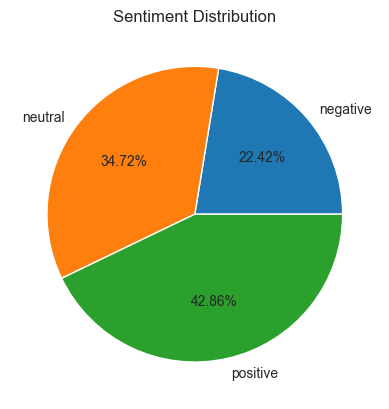

In [26]:
label_map = {-1: "negative", 0: "neutral", 1: "positive"}
counts = df['category'].value_counts().sort_index()

plt.pie(counts, labels=[label_map[i] for i in counts.index], autopct="%0.2f%%")
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
# Data is imbalanced

<h1 style="text-align:left;">Data Preparation</h1>


In [27]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


df['clean_text'] = df['clean_comment'].astype(str).apply(clean_text)

# Preview
print(df[['clean_comment','clean_text','category']].head())



                                       clean_comment  \
0   family mormon have never tried explain them t...   
1  buddhism has very much lot compatible with chr...   
2  seriously don say thing first all they won get...   
3  what you have learned yours and only yours wha...   
4  for your own benefit you may want read living ...   

                                          clean_text  category  
0  family mormon never tried explain still stare ...         1  
1  buddhism much lot compatible christianity espe...         1  
2  seriously say thing first get complex explain ...        -1  
3  learned want teach different focus goal wrappi...         0  
4  benefit may want read living buddha living chr...         1  


<h1 style="text-align:left;">Number of Samples per Category</h1>


In [28]:
label_map = {-1: "negative", 0: "neutral", 1: "positive"}
print(df['category'].map(label_map).value_counts())


category
positive    15771
neutral     12778
negative     8250
Name: count, dtype: int64


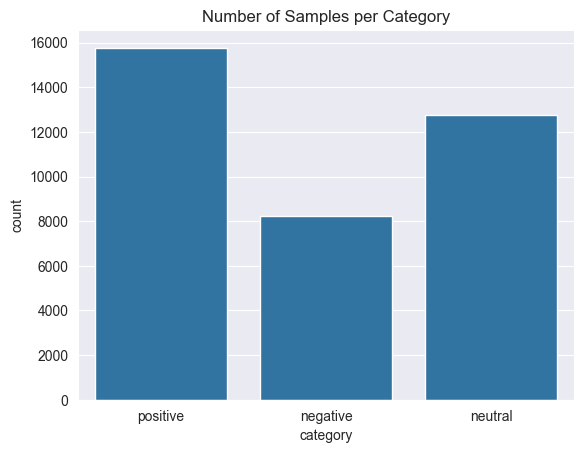

In [29]:
sns.countplot(x=df['category'].map(label_map))
plt.title("Number of Samples per Category")
plt.show()

<h1 style="text-align:left;">Most Frequent Words</h1>


Total words in Negative corpus: 188646


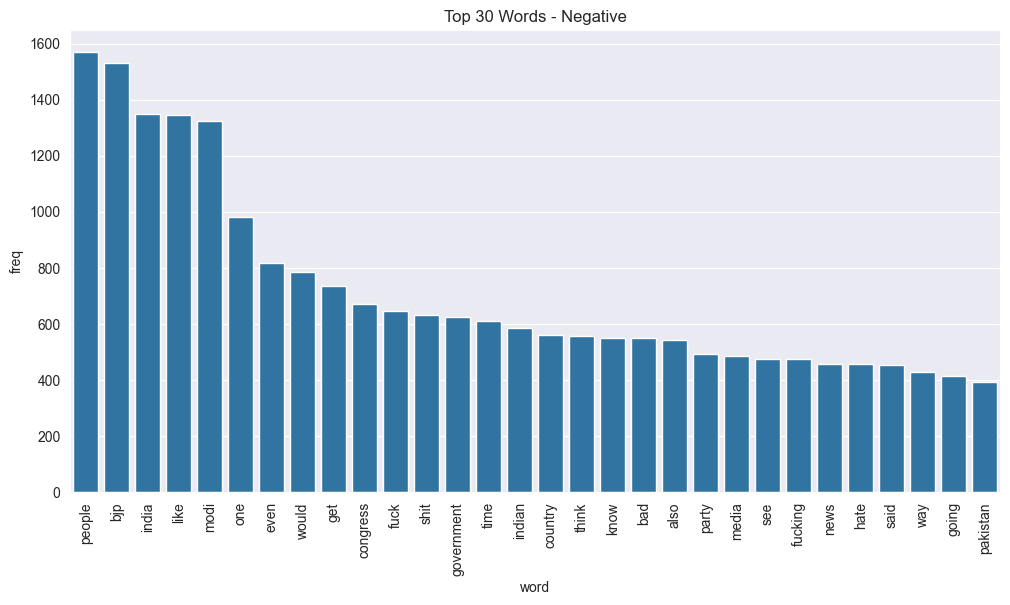

Total words in Neutral corpus: 88085


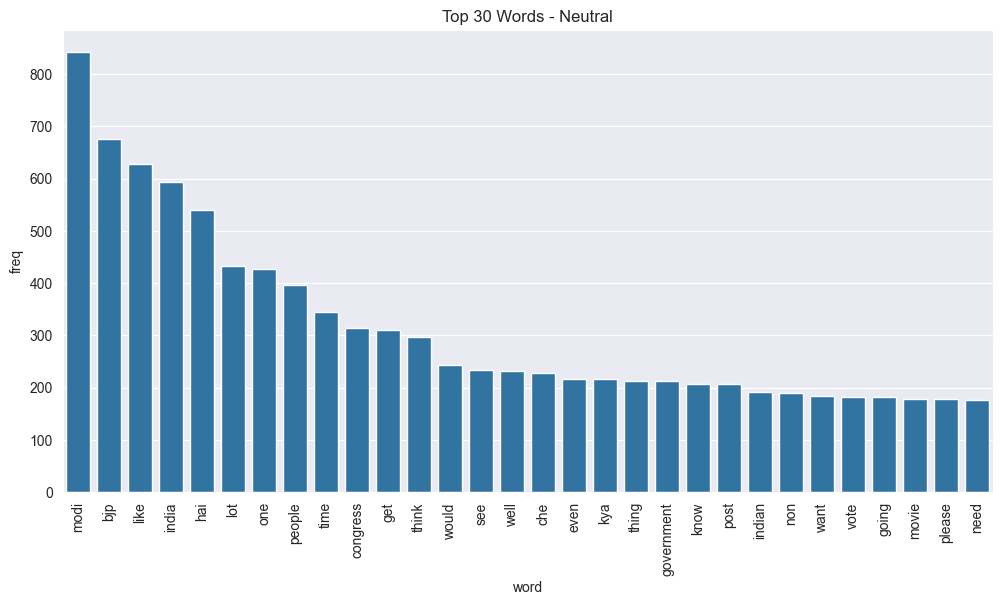

Total words in Positive corpus: 440548


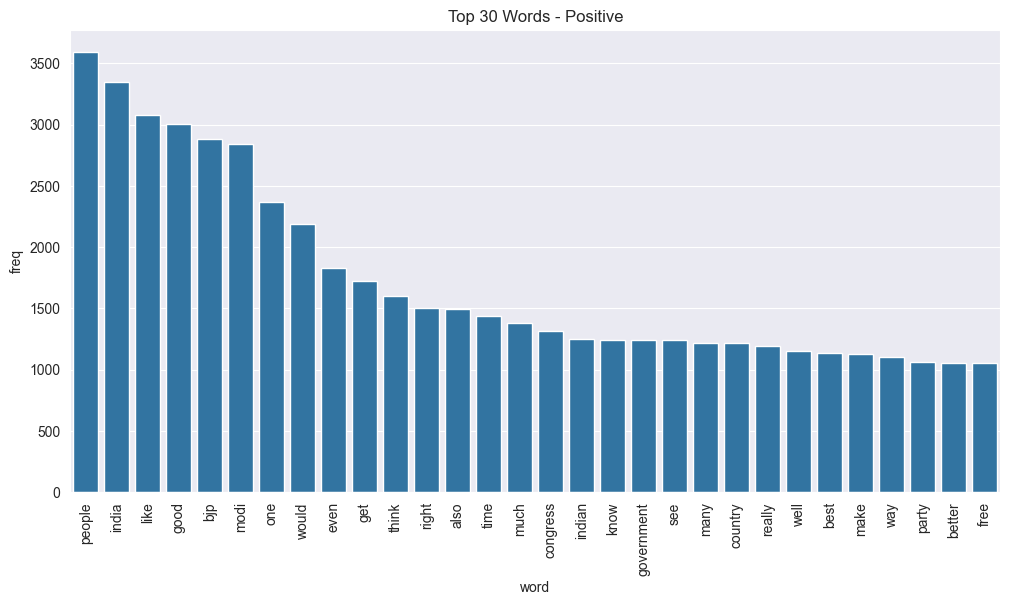

In [34]:
# Negative corpus
neg_corpus = []
for msg in df[df['category'] == -1]['clean_text'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

print("Total words in Negative corpus:", len(neg_corpus))

neg_top = pd.DataFrame(Counter(neg_corpus).most_common(30), columns=['word','freq'])
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='freq', data=neg_top)
plt.title("Top 30 Words - Negative")
plt.xticks(rotation=90)
plt.show()

# Neutral corpus
neu_corpus = []
for msg in df[df['category'] == 0]['clean_text'].tolist():
    for word in msg.split():
        neu_corpus.append(word)

print("Total words in Neutral corpus:", len(neu_corpus))

neu_top = pd.DataFrame(Counter(neu_corpus).most_common(30), columns=['word','freq'])
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='freq', data=neu_top)
plt.title("Top 30 Words - Neutral")
plt.xticks(rotation=90)
plt.show()

# Positive corpus
pos_corpus = []
for msg in df[df['category'] == 1]['clean_text'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

print("Total words in Positive corpus:", len(pos_corpus))

pos_top = pd.DataFrame(Counter(pos_corpus).most_common(30), columns=['word','freq'])
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='freq', data=pos_top)
plt.title("Top 30 Words - Positive")
plt.xticks(rotation=90)
plt.show()


In [35]:
print(df.head())

                                       clean_comment  category  \
0   family mormon have never tried explain them t...         1   
1  buddhism has very much lot compatible with chr...         1   
2  seriously don say thing first all they won get...        -1   
3  what you have learned yours and only yours wha...         0   
4  for your own benefit you may want read living ...         1   

                                          clean_text  
0  family mormon never tried explain still stare ...  
1  buddhism much lot compatible christianity espe...  
2  seriously say thing first get complex explain ...  
3  learned want teach different focus goal wrappi...  
4  benefit may want read living buddha living chr...  



 Logistic Regression Performance on Reddit Dataset
Accuracy : 0.8694
Precision: 0.8715
Recall   : 0.8694
F1-Score : 0.8661

Classification Report:
              precision    recall  f1-score   support

    negative      0.890     0.683     0.773      1650
     neutral      0.848     0.961     0.901      2556
    positive      0.881     0.893     0.887      3154

    accuracy                          0.869      7360
   macro avg      0.873     0.846     0.854      7360
weighted avg      0.871     0.869     0.866      7360



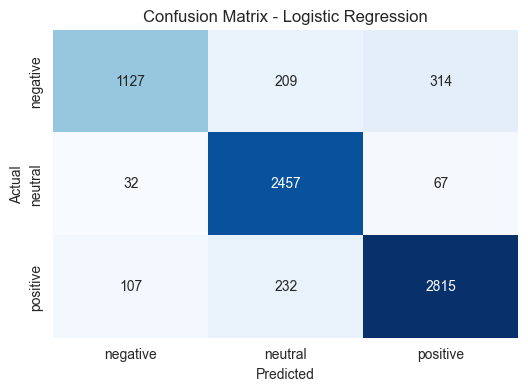


 Naive Bayes Performance on Reddit Dataset
Accuracy : 0.6575
Precision: 0.7427
Recall   : 0.6575
F1-Score : 0.6345

Classification Report:
              precision    recall  f1-score   support

    negative      0.927     0.315     0.470      1650
     neutral      0.831     0.522     0.642      2556
    positive      0.575     0.946     0.715      3154

    accuracy                          0.657      7360
   macro avg      0.778     0.594     0.609      7360
weighted avg      0.743     0.657     0.635      7360



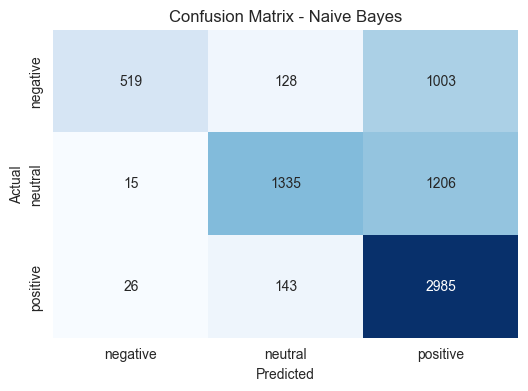


 MLP Neural Network Performance on Reddit Dataset
Accuracy : 0.8635
Precision: 0.8625
Recall   : 0.8635
F1-Score : 0.8629

Classification Report:
              precision    recall  f1-score   support

    negative      0.779     0.752     0.765      1650
     neutral      0.898     0.920     0.909      2556
    positive      0.877     0.876     0.876      3154

    accuracy                          0.863      7360
   macro avg      0.852     0.849     0.850      7360
weighted avg      0.863     0.863     0.863      7360



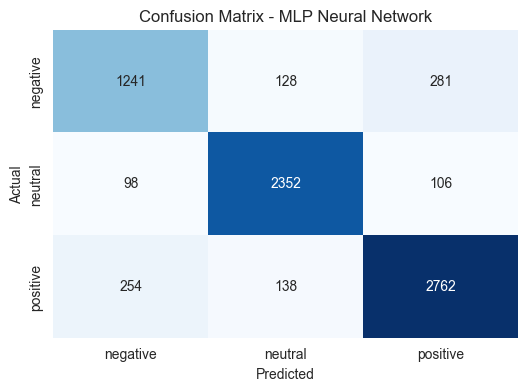


 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.869429   0.871452  0.869429  0.866131
1          Naive Bayes  0.657473   0.742731  0.657473  0.634545
2   MLP Neural Network  0.863451   0.862512  0.863451  0.862883


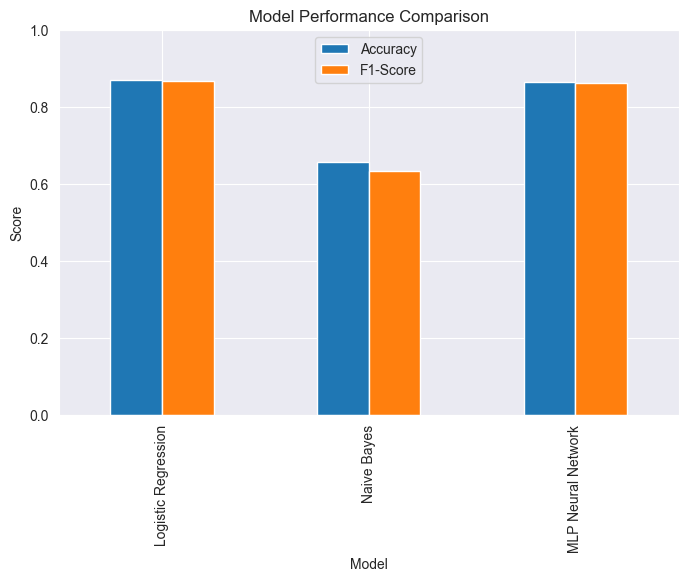

In [39]:
# --- Vectorize text ---
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_comment'])
y = df['category']


X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


labels = [-1, 0, 1]
names = ["negative", "neutral", "positive"]


results = []


def evaluate_model(model, name):
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")


    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1})


    print(f"\n {name} Performance on Reddit Dataset")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")


    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, labels=labels, target_names=names, digits=3))


    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=names, yticklabels=names)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(log_reg_model, "Logistic Regression")

# Naive Bayes
nb_model = MultinomialNB()
evaluate_model(nb_model, "Naive Bayes")

# Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
evaluate_model(mlp_model, "MLP Neural Network")

# Summary Table
summary_df = pd.DataFrame(results)
print("\n Model Comparison Summary:")
print(summary_df)


summary_df.set_index("Model")[["Accuracy","F1-Score"]].plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

In [37]:
# Mapping
label_map = {-1: "negative", 0: "neutral", 1: "positive"}

def predict_sentence(text, model, vectorizer):
    # Transform input sentence using the trained vectorizer
    X_new = vectorizer.transform([text])

    # Predict category
    pred = model.predict(X_new)[0]

    # Predict probability (if available)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_new)[0]
        prob_dict = {label_map[label]: round(probs[i], 3)
                     for i, label in enumerate(model.classes_)}
    else:
        prob_dict = None

    return pred, label_map[pred], prob_dict


In [38]:
# Choose a trained model, e.g., Logistic Regression
sentence = input("Enter a sentence: ")

pred_label, pred_name, pred_probs = predict_sentence(sentence, log_reg_model, vectorizer)

print(f"Predicted Label: {pred_label} ({pred_name})")
if pred_probs:
    print("Probabilities:", pred_probs)


Predicted Label: 0 (neutral)
Probabilities: {'negative': np.float64(0.048), 'neutral': np.float64(0.895), 'positive': np.float64(0.058)}


In [77]:
import joblib

# Save the trained model and vectorizer
joblib.dump(log_reg_model, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']